In [1]:
import pandas as pd
# file name 합치기
from glob import glob
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
from sklearn.model_selection import train_test_split
# 시각화
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from skimage import io, feature
from skimage.transform import resize
import cv2
from PIL import ImageChops
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
# 다중 회귀분석
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import sys,os
from pprint import pprint 
parent_dir = os.path.dirname(os.getcwd())
parent_dir = os.path.dirname(parent_dir)
sys.path.append(parent_dir)

# 기본 세팅
import seaborn as sns

# 한글 폰트 문제 해결
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [2]:
import pandas as pd ,sys,os
sys.path.append("../../Functions/")
# from Function import DataPreprocessing as DP
input_data = pd.read_csv('../../Data/2023_smartFarm_AI_hackathon_dataset.csv')
input_data.tail()


,frmDist,date,inTp,inHd,otmsuplyqy,acSlrdQy,cunt,ph,outTp,outWs,...,outtrn_cumsum,WaterUsage,WaterCost,FertilizerUsage,FertilizerCost,CO2Usage,CO2Cost,MistUsageTime,Mist Cost,HeatingEnergyUsage_cumsum
84835,DBSF9969,20180710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,235272.042536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84836,DBSF9969,20180711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,227947.124946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84837,DBSF9969,20180712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,231527.426327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84838,DBSF9969,20180713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,251254.321635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84839,DBSF9969,20180714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
input_data

,frmDist,date,inTp,inHd,otmsuplyqy,acSlrdQy,cunt,ph,outTp,outWs,...,outtrn_cumsum,WaterUsage,WaterCost,FertilizerUsage,FertilizerCost,CO2Usage,CO2Cost,MistUsageTime,Mist Cost,HeatingEnergyUsage_cumsum
0,DBSF1059,20220926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0
1,DBSF1059,20221001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,1347.554178,202.133127,4711.308821,5936.249114,0.000000,0.0000,190.168990,2221.173803,0.0
2,DBSF1059,20221002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,69.899353,10.484903,271.379890,341.938662,0.000000,0.0000,0.000000,0.000000,0.0
3,DBSF1059,20221003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,412.225065,61.833760,1539.505534,1939.776973,253.744916,149.7095,0.000000,0.000000,0.0
4,DBSF1059,20221004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,590.608634,88.591295,2614.973165,3294.866187,3032.885084,1789.4022,1.149739,13.428955,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84835,DBSF9969,20180710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,235272.042536,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0
84836,DBSF9969,20180711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,227947.124946,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0
84837,DBSF9969,20180712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,231527.426327,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0
84838,DBSF9969,20180713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,251254.321635,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0


In [4]:
count_zero = (input_data["inTp"] == 0).sum()
count_non_zero = (input_data["inTp"] != 0).sum()
print(count_zero)
print(count_non_zero)

12210
72630


In [5]:
d = np.array(input_data.columns)
d.shape[0]

47

In [6]:
input_data.columns.shape[0]

47

In [7]:
input_data.columns[0]

'frmDist'

In [8]:
# def column_zero_find(data):
#     dataCount = data.columns.shape[0]
#     for i in range(dataCount):

#         input_data.columns[i]
#         count_zero = (data[data.columns[i]] == 0).sum()
#         count_non_zero = (data[data.columns[i]] != 0).sum()
#         sizes = [count_zero, count_non_zero]
#         labels = [f'{count_zero}개\n0인 데이터', f'{count_non_zero}개\n0이 아닌 데이터']
#         colors = ['#ff9999','#66b3ff']
#         #print(count_non_zero)
#         #파이차트 생성
#         plt.figure(figsize=(3, 3))
#         plt.title(f"{input_data.columns[i]}컬럼 0비율")
#         plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
#         plt.axis('equal')
#         plt.show()

In [9]:
(input_data["CO2Cost"] == 0).sum()

83700

In [3]:
from Function import DataPreprocessing as DP

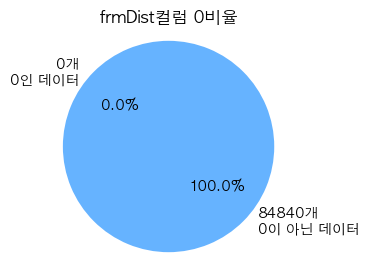

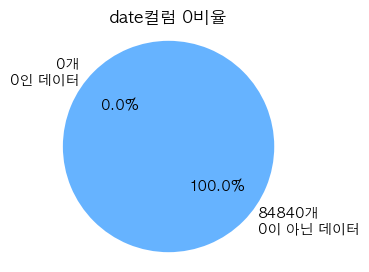

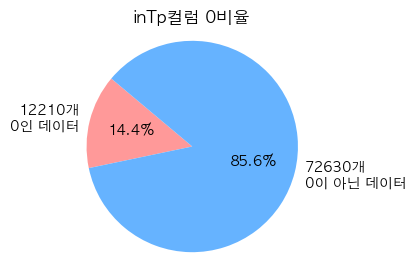

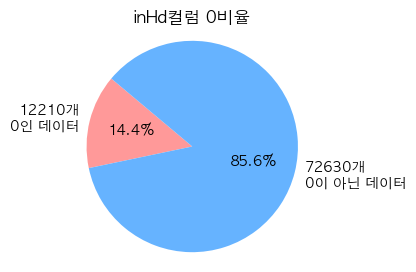

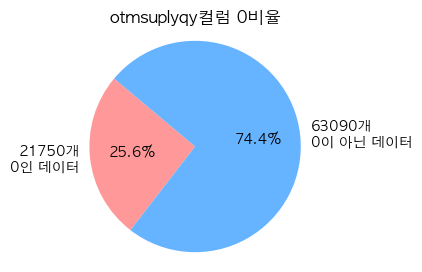

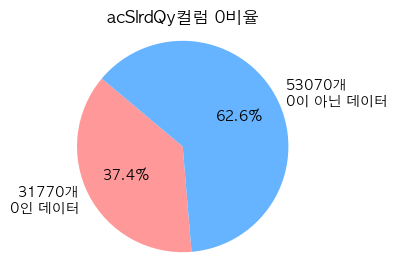

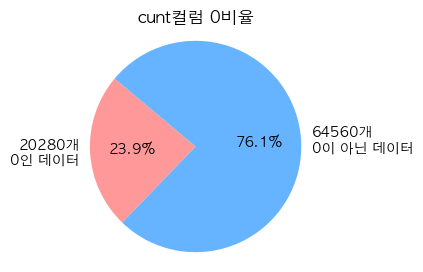

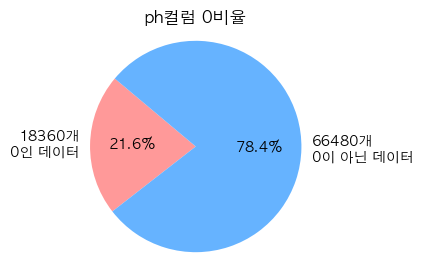

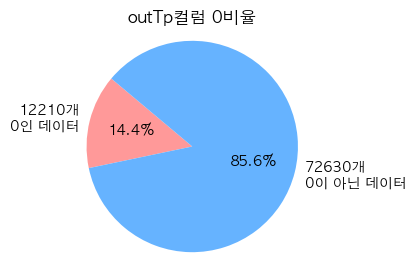

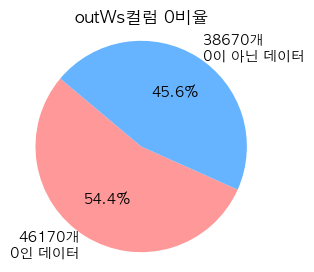

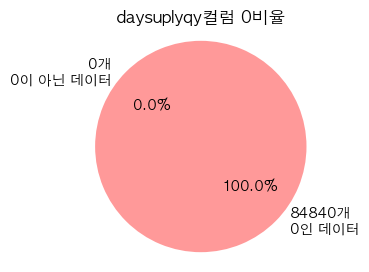

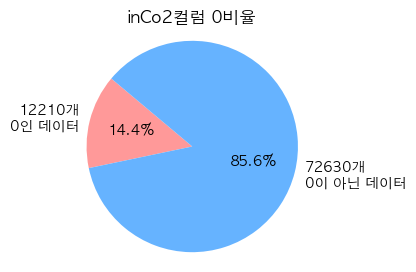

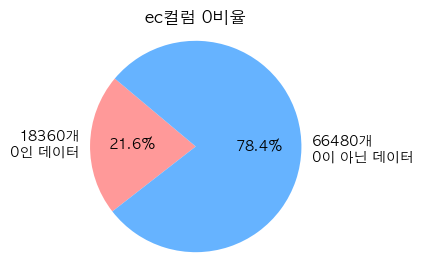

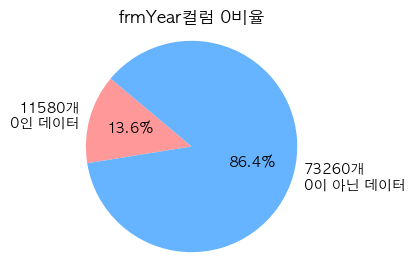

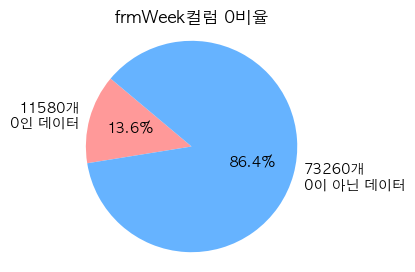

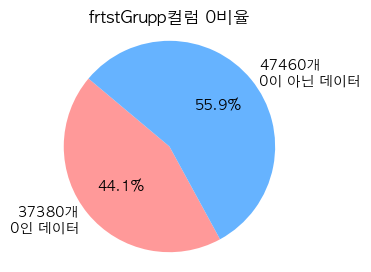

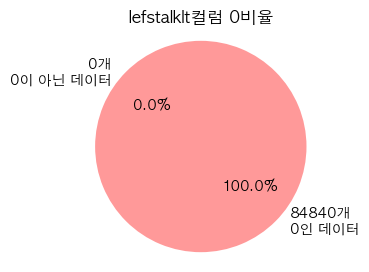

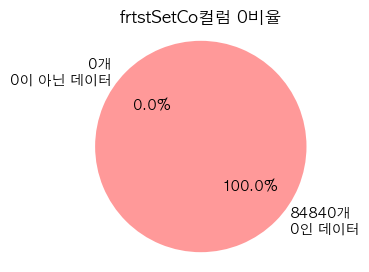

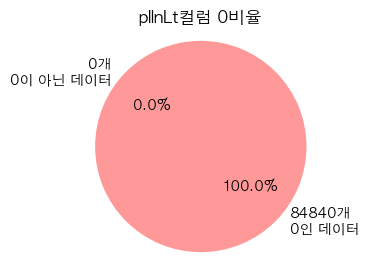

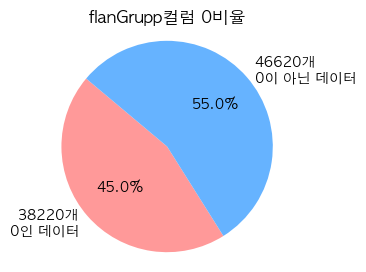

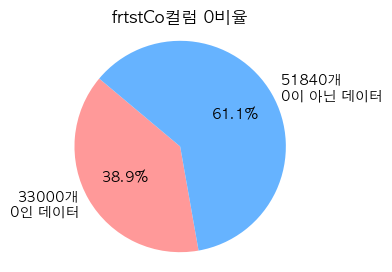

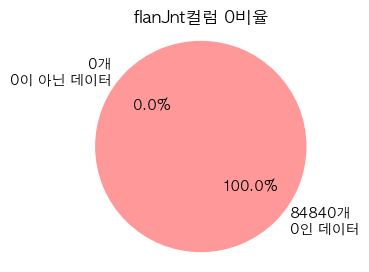

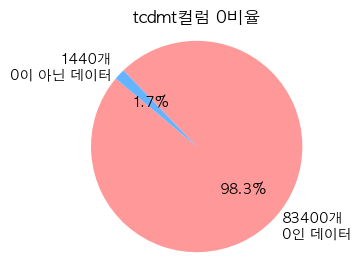

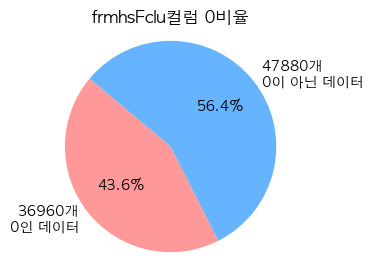

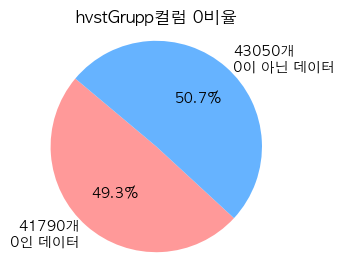

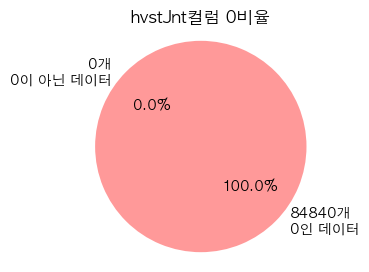

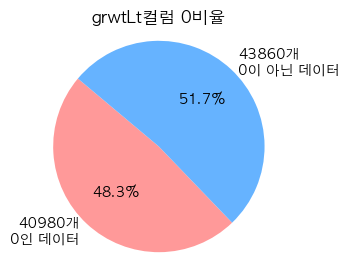

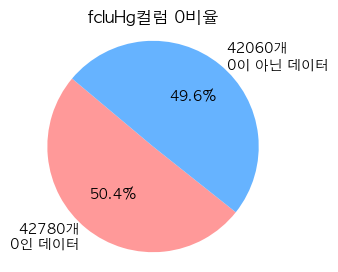

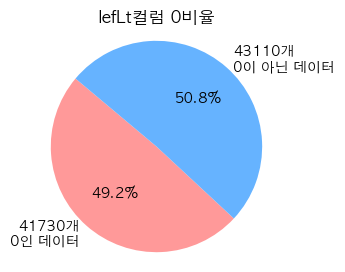

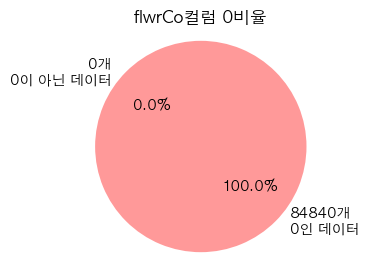

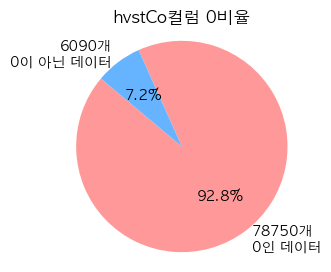

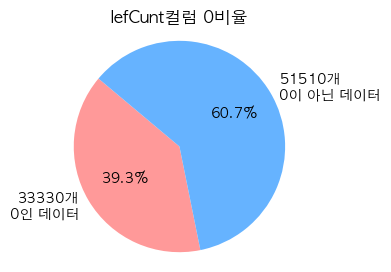

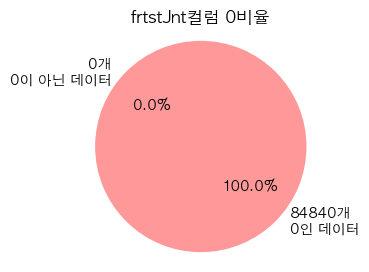

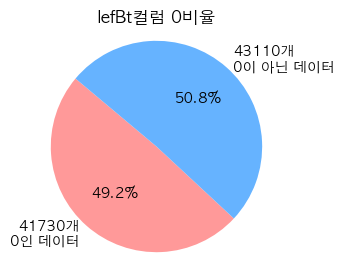

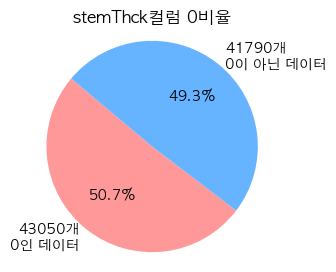

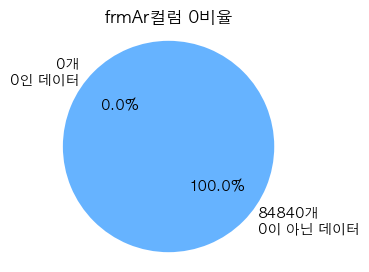

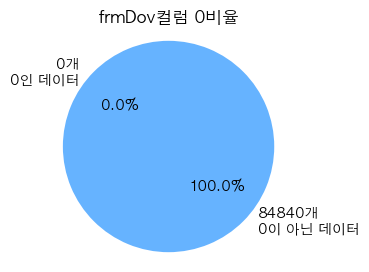

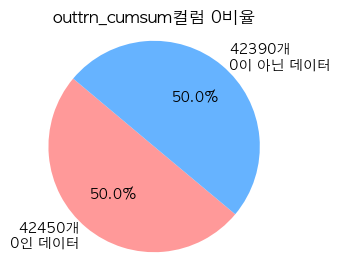

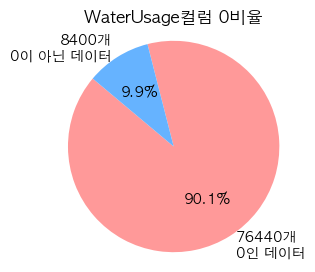

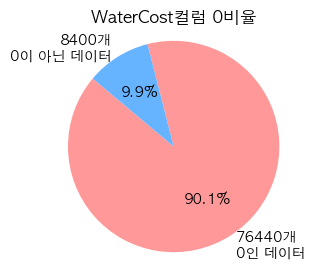

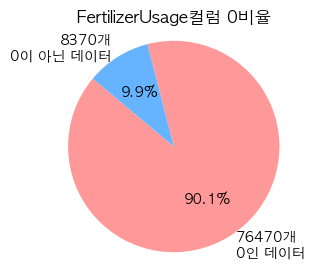

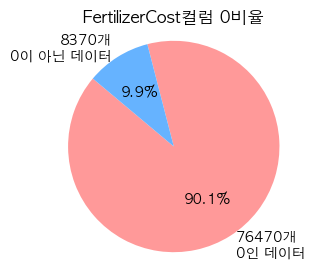

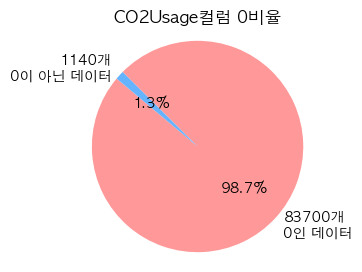

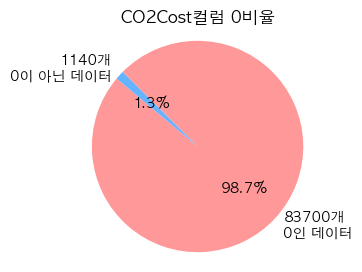

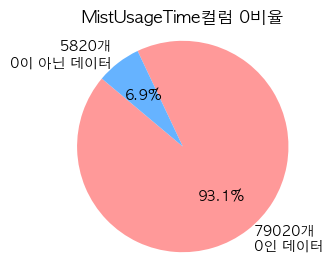

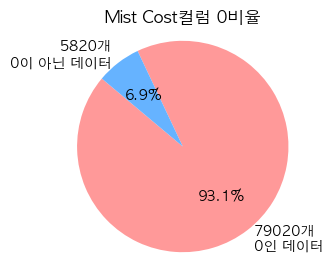

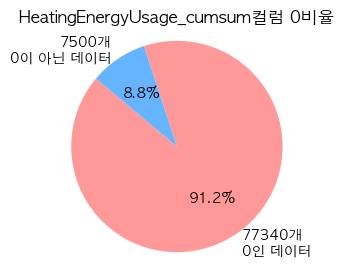

In [4]:
DP.column_zero_find(input_data)